In [1]:
import torch
from torch import nn

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('training.txt')
data

array([[19.410541 , 11.45899  ,  0.       ],
       [23.765585 , 13.972661 ,  0.       ],
       [10.719978 ,  8.8566508,  0.       ],
       ...,
       [ 8.8913669, 12.265898 ,  1.       ],
       [14.197481 , 10.280842 ,  1.       ],
       [ 6.7481281, 10.253769 ,  1.       ]])

In [3]:
val_data = np.loadtxt('test.txt')
val_data

array([[17.152491 ,  7.6907257,  0.       ],
       [15.226864 , 11.814989 ,  0.       ],
       [19.568989 , 13.543812 ,  0.       ],
       ...,
       [ 7.2258284,  9.3664595,  1.       ],
       [10.041861 ,  8.8377143,  1.       ],
       [10.046262 ,  8.3111921,  1.       ]])

In [4]:
def suffle(x):
    arr = np.arange(0, len(x))
    np.random.shuffle(arr)
    return x[arr]

In [5]:
suffled_data = suffle(data)
suffled_data

array([[ 5.9034138, 10.414797 ,  1.       ],
       [11.803439 ,  7.8525637,  0.       ],
       [ 7.6320309,  9.453888 ,  1.       ],
       ...,
       [ 5.8764185,  6.9975475,  1.       ],
       [10.476134 , 12.00643  ,  1.       ],
       [18.081693 , 15.611759 ,  0.       ]])

In [6]:
suffled_val_data = suffle(val_data)
suffled_val_data

array([[10.431096 , 13.429528 ,  1.       ],
       [ 9.5518355,  9.5200233,  1.       ],
       [ 8.8597043, 12.698422 ,  1.       ],
       ...,
       [ 6.0455231,  8.01029  ,  1.       ],
       [19.441869 , 10.988994 ,  0.       ],
       [14.624091 ,  5.2752442,  0.       ]])

In [7]:
splited_data = np.split(suffled_data, (2, 3), axis=1)
X = splited_data[0]
y = splited_data[1]
print(X)
print(y)

[[ 5.9034138 10.414797 ]
 [11.803439   7.8525637]
 [ 7.6320309  9.453888 ]
 ...
 [ 5.8764185  6.9975475]
 [10.476134  12.00643  ]
 [18.081693  15.611759 ]]
[[1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.

In [8]:
splited_val_data = np.split(suffled_val_data, (2, 3), axis=1)
X_val = splited_val_data[0]
y_val = splited_val_data[1]
print(X_val)
print(y_val)

[[10.431096  13.429528 ]
 [ 9.5518355  9.5200233]
 [ 8.8597043 12.698422 ]
 ...
 [ 6.0455231  8.01029  ]
 [19.441869  10.988994 ]
 [14.624091   5.2752442]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [0.]
 [0.]]


In [9]:
X.shape[0]

1000

In [10]:
X_val.shape[0]

3000

In [11]:
X_tensor = torch.Tensor(X)
y_tensor = torch.Tensor(y)
X_val_tensor = torch.Tensor(X_val)
y_val_tensor = torch.Tensor(y_val)

In [12]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(2, 8),
            nn.Sigmoid(),
            nn.Linear(8, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits

In [13]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=8, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [14]:
def train_loop(model, loss_fn, optimizer, X, y):
    batch_mask = torch.randint(0, 1000, (1, ))

    # Compute prediction and loss
    pred = model(X[batch_mask])
    loss = loss_fn(pred, y[batch_mask])

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss= loss.item()
    print(f"loss: {loss:>7f}")
    return loss


# def test_loop(model, loss_fn):
#     num_batches = len(dataloader)
#     test_loss, correct = 0, 0
#
#     with torch.no_grad():
#         for X, y in dataloader:
#             pred = model(X)
#             test_loss += loss_fn(pred, y).item()
#             correct += (pred.argmax(1) == y).type(torch.float).sum().item()
#
#     test_loss /= num_batches
#     correct /= size
#     print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Epoch 1
-------------------------------
loss: 0.444248
Epoch 2
-------------------------------
loss: 0.098058
Epoch 3
-------------------------------
loss: 0.107749
Epoch 4
-------------------------------
loss: 0.493035
Epoch 5
-------------------------------
loss: 0.458209
Epoch 6
-------------------------------
loss: 0.104656
Epoch 7
-------------------------------
loss: 0.103479
Epoch 8
-------------------------------
loss: 0.456027
Epoch 9
-------------------------------
loss: 0.465290
Epoch 10
-------------------------------
loss: 0.105695
Epoch 11
-------------------------------
loss: 0.097969
Epoch 12
-------------------------------
loss: 0.118560
Epoch 13
-------------------------------
loss: 0.109140
Epoch 14
-------------------------------
loss: 0.107263
Epoch 15
-------------------------------
loss: 0.103590
Epoch 16
-------------------------------
loss: 0.484286
Epoch 17
-------------------------------
loss: 0.099784
Epoch 18
-------------------------------
loss: 0.114395
E

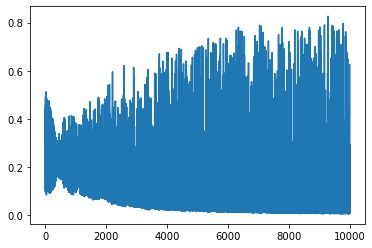

In [15]:
learning_rate = 1e-2
epochs = 10000

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

results = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    result = train_loop(model, loss_fn, optimizer, X_tensor, y_tensor)
    results.append(result)
    # test_loop(test_dataloader, model, loss_fn)
print("Done!")

plt.plot(results)

Epoch 1
-------------------------------
loss: 0.288443
Epoch 2
-------------------------------
loss: 0.231018
Epoch 3
-------------------------------
loss: 0.219850
Epoch 4
-------------------------------
loss: 0.281667
Epoch 5
-------------------------------
loss: 0.271086
Epoch 6
-------------------------------
loss: 0.221119
Epoch 7
-------------------------------
loss: 0.278021
Epoch 8
-------------------------------
loss: 0.220783
Epoch 9
-------------------------------
loss: 0.214868
Epoch 10
-------------------------------
loss: 0.212647
Epoch 11
-------------------------------
loss: 0.296971
Epoch 12
-------------------------------
loss: 0.208678
Epoch 13
-------------------------------
loss: 0.206168
Epoch 14
-------------------------------
loss: 0.201363
Epoch 15
-------------------------------
loss: 0.282562
Epoch 16
-------------------------------
loss: 0.197088
Epoch 17
-------------------------------
loss: 0.299226
Epoch 18
-------------------------------
loss: 0.201657
E

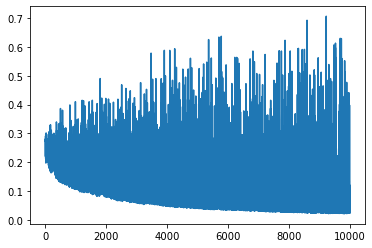

In [17]:
model = NeuralNetwork()

optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)

results = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    result = train_loop(model, loss_fn, optimizer, X_tensor, y_tensor)
    results.append(result)
    # test_loop(test_dataloader, model, loss_fn)
print("Done!")

plt.plot(results)